**Projeto de Técnicas de Programação I**

Você trabalha em uma consultoria de dados que foi contratada para realizar a distribuição de materiais didáticos nas escolas da cidade do Rio de Janeiro. Sua missão é realizar tratamentos nos dados de acordo com as normas de padrão definidas pelo cliente e encontrar qual a melhor rota que um caminhão deve realizar para entregar os materiais didáticos de forma a otimizar o seu percurso.

Para esse projeto você recebeu três arquivos:

*   escolas.csv: contém os dados das escolas. Baixe o dataset aqui;
*   subprefeituras.csv: contém dados de quais bairros pertem a cada subprefeitura. Baixe o dataset aqui;
*   material_didatico.csv: contém a quantidade de material didático que cada escola deve receber. Baixe o dataset aqui.


Como produto final, você deve entregar:

* um arquivo csv no qual as linhas já estarão ordenas de acordo com a rota a ser seguida. Além disso, os dados devem estar no padrão especificado abaixo e contendo as seguintes colunas: id da escola, nome da escola, tipo da escola (EM, CIEP ou colégio), logradouro da entrega, número, bairro, subprefeitura, latitude, longitude e quantidade de material didático que deve ser entregue. O logradouro da escola deve estar em uma coluna diferente do número;
* um arquivo csv com a quantidade total de material escolar por subprefeitura para que sejam contabilizados os custos por subprefeitura

Como padrão dos dados, considere:

* nome das colunas em snake_case
* strings não devem conter acentos
* todas as strings devem estar em maiúsculo
* padronização do nome dos logradouros sem abreviação (Ex: R. deve estar como Rua)
* latitude e longitude devem conter apenas 5 casas decimais
* os ids da escola devem todos ser strings com 3 caracteres (Ex: '024')

Desafio:

Entregar um plot com a representação da melhor rota que você encontrou, por exemplo:

![Alt text](https://s3-sa-east-1.amazonaws.com/lcpi/b888027e-95e8-48e5-a6ac-07ca0be68fc4.png)



Obs: O otimizador não é a parte mais importante do projeto. Foque no tratamento dos dados e se preciso, pode reduzir a quantidade de escolas para rodar o otimizador.

In [35]:
!pip install unidecode

In [36]:
# Importação das bibliotecas
import pandas as pd
from unidecode import unidecode

# URL dos Datasets
url_escolas = "https://s3-sa-east-1.amazonaws.com/lcpi/5c790ffd-ddeb-4cfa-a2a1-f2fc3fbc2016.csv"
url_subprefeituras = "https://s3-sa-east-1.amazonaws.com/lcpi/2c9f4b63-b826-4c89-b681-a741081a493a.csv"
url_material_didatico = "https://s3-sa-east-1.amazonaws.com/lcpi/005c3bc7-11e5-4075-a473-d26893619284.csv"

# Gerando DataFrame
df_escolas = pd.read_csv(url_escolas)
df_subprefeituras = pd.read_csv(url_subprefeituras)
df_material = pd.read_csv(url_material_didatico)

In [37]:
# Entendendo os DataFrames

display(df_escolas)
display(df_escolas.info())
display(df_escolas.isnull().sum())

display(df_subprefeituras)
display(df_subprefeituras.info())
display(df_subprefeituras.isnull().sum())

display(df_material)
display(df_material.describe())
display(df_material.isnull().sum())

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,"-23,009084","-43,537582"
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,Caminho da Matriz 4406,"-22,994124","-43,593683"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              152 non-null    int64 
 1   Escolas_Postos  152 non-null    object
 2   BAIRRO          152 non-null    object
 3   ENDEREÇO        152 non-null    object
 4   lat             152 non-null    object
 5   lon             152 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.2+ KB


None

id                0
Escolas_Postos    0
BAIRRO            0
ENDEREÇO          0
lat               0
lon               0
dtype: int64

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro
...,...,...
159,Santa Cruz,Zona Oeste
160,Guaratiba,Zona Oeste
161,Barra de Guaratiba,Zona Oeste
162,Pedra de Guaratiba,Zona Oeste


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nome           164 non-null    object
 1   subprefeitura  164 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


None

nome             0
subprefeitura    0
dtype: int64

,id,Quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
...,...,...
146,474,320
147,301,335
148,215,NaN
149,606,521


,id
count,151.000000
mean,366.205298
std,198.961615
min,11.000000
25%,208.000000
50%,378.000000
75%,535.500000
max,698.000000


id            0
Quantidade    4
dtype: int64

In [38]:
# Dicionário utilizado para substituição de string no campo de endereço
dict_troca = {
    'AV': 'AVENIDA',
    'R': 'RUA',
    'PCA': 'PRACA',
    'ESTR': 'ESTRADA',
    'CONJ': 'CONJUNTO',
    'S/N': ''
}

dict_troca_nome_escola = {
    'CENTRO INTEGRADO DE EDUCACAO PUBLICA': 'CIEP',
    'ESCOLA MUNICIPAL': 'EM',
    'COLEGIO MUNICIPAL': 'CM'
}

dict_troca_bairro = {
    'MARACANA/ TIJUCA': 'MARACANA',
    'MARACANA/ VILA ISABEL': 'MARACANA',
    'NOVA SEPETIBA': 'SEPETIBA',
    'RECREIO': 'RECREIO DOS BANDEIRANTES',
    'OSWALDO CRUZ': 'OSVALDO CRUZ',
    'FREGUESIA JPA': 'FREGUESIA (JACAREPAGUA)'
}

# Função para remover caracter especiais e pontuações. Utilizamos a biblioteca Unicode
def remove_caracter_especial(string):
  return unidecode(string.replace('.', '').replace(',', '').replace('º','').replace('°', ''))

# Função criada para tratar os nomes das colunas
def trata_nome_colunas(columns):
  columns = columns.str.strip()
  columns = columns.str.replace(' ','_')
  columns = columns.str.lower()
  columns = [remove_caracter_especial(column) for column in columns]
  return columns

# Função para padronizar o endereço, separando também o logradouro do número em lista
def padroniza_endereco(string):
  string = remove_caracter_especial(string).upper()
  lista = string.split(' ')
  logradouro = []
  numero = ''
  if lista[-1].isdigit():
    numero = lista[-1]
    lista.pop(-1)
  for indice in range(len(lista)):
    for chave, valor in dict_troca.items():
      if lista[indice] == chave:
        lista[indice] = valor
  logradouro = ' '.join(lista).strip()
  return logradouro+','+numero

# Função para padronizar o nome da escola
def padroniza_nome_escola(string):
  string = remove_caracter_especial(string).upper()
  for chave, valor in dict_troca_nome_escola.items():
    if chave in  string:
      string = string.replace(chave, valor)
  return string

def padroniza_bairro(string):
  string = remove_caracter_especial(string).upper()
  for chave, valor in dict_troca_bairro.items():
    if chave in  string:
      string = string.replace(chave, valor)
  return string

# Função que padroniza os campos Latitude e Longitude
def padroniza_lat_lon(valor):
  if type(valor) == str:
    valor = valor.replace(',','.')
    valor = float(valor)
    valor = round(valor,5)
  return valor

# Função que padroniza os ID
def padroniza_id(valor):
  if type(valor) == int:
    valor = "{:03d}".format(valor)
  return valor

# Função resposn´savel por padronizar o campo de quantidade
def converte_numero(string):
  string = str(string).replace("'","").replace('"',"").replace("''",'')
  if string.isdigit():
    return int(string)
  else:
    return None

# Aplica o tratamento dos nomes das colunas
df_escolas.columns = trata_nome_colunas(df_escolas.columns)
df_material.columns = trata_nome_colunas(df_material.columns)
df_subprefeituras.columns = trata_nome_colunas(df_subprefeituras.columns)

# Aplica o tratamento nos demais campos do DataSet ESCOLAS
df_escolas['escolas_postos'] = df_escolas['escolas_postos'].map(padroniza_nome_escola)
df_escolas[['tipo','nome']] = df_escolas['escolas_postos'].str.split(pat=' ', n=1, expand=True)
df_escolas['bairro'] = df_escolas['bairro'].map(padroniza_bairro)
df_escolas['lat'] = df_escolas['lat'].map(padroniza_lat_lon)
df_escolas['lon'] = df_escolas['lon'].map(padroniza_lat_lon)
df_escolas['endereco'] = df_escolas['endereco'].map(padroniza_endereco)
df_escolas[['logradouro','numero']] = df_escolas['endereco'].str.split(',', expand=True)
df_escolas['id'] = df_escolas['id'].map(padroniza_id)
df_escolas

# Aplica o tratamento nos demais campos do DataSet MATERIAL
df_material['id'] = df_material['id'].map(padroniza_id)

# Aplica o tratamento nos demais campos do DataSet SUBPREFEITURAS
df_subprefeituras['subprefeitura'] = df_subprefeituras['subprefeitura'].map(remove_caracter_especial)
df_subprefeituras['subprefeitura'] = df_subprefeituras['subprefeitura'].str.upper()
df_subprefeituras['nome'] = df_subprefeituras['nome'].map(remove_caracter_especial)
df_subprefeituras['nome'] = df_subprefeituras['nome'].str.upper()

# Renomeando nome das colunas
df_subprefeituras.rename(columns={"nome": "bairro"}, inplace=True)

In [39]:
# Pelas análises detectamos que o campo ID é uma chave primaria, então verificamos a existencia de duplicidades.
print('Quantidade de Registros: ')
print(df_escolas['id'].count())
print('Quantidade de ID únicos: ')
print(df_escolas['id'].nunique())

Quantidade de Registros: 
152
Quantidade de ID únicos: 
136


In [40]:
print('Quantidade de Registros: ')
print(df_material['id'].count())
print('Quantidade de ID únicos: ')
print(df_material['id'].nunique())

Quantidade de Registros: 
151
Quantidade de ID únicos: 
151


In [41]:
print('Quantidade de Registros: ')
print(df_subprefeituras['bairro'].count())
print('Quantidade de Nomes únicos: ')
print(df_subprefeituras['bairro'].nunique())

Quantidade de Registros: 
164
Quantidade de Nomes únicos: 
164


In [42]:
# Analisando os dados percebemos muitas linha duplicadas no DataSet ESCOLAS. Então decidimos remover as linhas duplicadas desta dataframe
df_escolas = df_escolas.drop_duplicates().sort_values('id')

In [43]:
# Observamos que mesmo removendo as linhas duplicadas existem ainda algumas que não foram removidas
print('Quantidade de Registros: ')
print(df_escolas['id'].count())
print('Quantidade de ID únicos: ')
print(df_escolas['id'].nunique())

Quantidade de Registros: 
138
Quantidade de ID únicos: 
136


In [44]:
# Verificando se tem registro com mesmo ID de escola
df_escolas['id'].value_counts() > 1

413     True
206     True
011    False
483    False
490    False
       ...  
217    False
215    False
211    False
210    False
690    False
Name: id, Length: 136, dtype: bool

In [45]:
# Analisando registros de ID  413
df_escolas[(df_escolas['id']=='413')]

,id,escolas_postos,bairro,endereco,lat,lon,tipo,nome,logradouro,numero
15,413,EM COCIO BARCELOS,COPACABANA,"RUA BARAO DE IPANEMA,34",-22.74828,-43.18906,EM,COCIO BARCELOS,RUA BARAO DE IPANEMA,34
14,413,EM COCIO BARCELOS,COPACABANA,"RUA BARAO DE IPANEMA,34",-22.97483,-43.18906,EM,COCIO BARCELOS,RUA BARAO DE IPANEMA,34


In [46]:
# Analisando registros de ID  206
df_escolas[(df_escolas['id']=='206')]

,id,escolas_postos,bairro,endereco,lat,lon,tipo,nome,logradouro,numero
99,206,EM HONDURAS,PRACA SECA,"PRACA BARAO DA TAQUARA,12",-2.289693e+01,-4.335267e+01,EM,HONDURAS,PRACA BARAO DA TAQUARA,12
117,206,EM HONDURAS,PRACA SECA,"PRACA BARAO DA TAQUARA,12",-2.289693e+07,-4.335267e+07,EM,HONDURAS,PRACA BARAO DA TAQUARA,12


In [47]:
# Conforme análise decidimos excluir as 2 (duas) linhas de Escolas que possuem indice maior. Inclusive percebemos que um dos registro esta com a LAT e LOG com pontuação errada.
df_escolas.drop(index = 15, inplace=True)
df_escolas.drop(index = 117, inplace=True)

In [48]:
# Confirmamos que não possui mais linhas com ID duplicados.
print('Quantidade de Registros: ')
print(df_escolas['id'].count())
print('Quantidade de ID únicos: ')
print(df_escolas['id'].nunique())

Quantidade de Registros: 
136
Quantidade de ID únicos: 
136


In [49]:
# Observamos que não possuem valores discrepantes na LAT e LON após a limpeza dos dados
df_escolas.describe()

,lat,lon
count,136.000000,136.000000
mean,-22.902488,-43.368643
std,0.048120,0.151291
min,-23.019810,-43.697350
25%,-22.929322,-43.468382
50%,-22.898060,-43.333635
75%,-22.872120,-43.253050
max,-22.807690,-43.168890


In [50]:
# Observamos pelo describe que a coluna quantidade não esta como numerico e percebemos também pelo isnull que também possui valores Nulos
df_material.describe()

,id,quantidade
count,151,147
unique,151,134
top,178,342
freq,1,3


In [51]:
# Padronizando o campo quantidade

df_material['quantidade'] = df_material['quantidade'].map(converte_numero)

In [52]:
df_material

,id,quantidade
0,178,20.0
1,634,121.0
2,483,220.0
3,476,190.0
4,132,67.0
...,...,...
146,474,320.0
147,301,335.0
148,215,NaN
149,606,521.0


In [53]:
#  Campos para o arquivo 01: (id da escola, nome da escola, tipo da escola (EM, CIEP ou colégio), logradouro da entrega, número, bairro, subprefeitura, latitude, longitude e quantidade de material didático que deve ser entregue)
df_escola_quantidade = pd.merge(df_escolas, df_material, how = 'left', on = 'id')
df_geral = pd.merge(df_escola_quantidade, df_subprefeituras, how = 'left', on = 'bairro')

In [54]:
df_geral

,id,escolas_postos,bairro,endereco,lat,lon,tipo,nome,logradouro,numero,quantidade,subprefeitura
0,011,CIEP SAMUEL WEINER,TIJUCA,"AVENIDA HEITOR BELTRAO,",-22.92127,-43.22800,CIEP,SAMUEL WEINER,AVENIDA HEITOR BELTRAO,,445.0,GRANDE TIJUCA
1,016,CIEP JOAO BATISTA DOS SANTOS,CIDADE DE DEUS,"RUA EDGAR WERNECK,1565",-22.94711,-43.35974,CIEP,JOAO BATISTA DOS SANTOS,RUA EDGAR WERNECK,1565,430.0,JACAREPAGUA
2,017,EM PRESIDENTE JOSE LINHARES,IPANEMA,"RUA BARAO DA TORRE,90",-22.98333,-43.19904,EM,PRESIDENTE JOSE LINHARES,RUA BARAO DA TORRE,90,48.0,ZONA SUL
3,020,EM TAGORE,PIEDADE,"PRACA FREDERICO DUVAL,",-22.88766,-43.30247,EM,TAGORE,PRACA FREDERICO DUVAL,,255.0,ZONA NORTE
4,023,EM CERVANTES,BENTO RIBEIRO,"RUA ABILIO DOS SANTOS,170",-22.86459,-43.36595,EM,CERVANTES,RUA ABILIO DOS SANTOS,170,342.0,ZONA NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...
131,673,EM GRECIA,VILA DA PENHA,"AVENIDA BRAZ DE PINA,1614",-22.83783,-43.31254,EM,GRECIA,AVENIDA BRAZ DE PINA,1614,393.0,ZONA NORTE
132,676,EM ANISIO TEIXEIRA,JARDIM GUANABARA,"RUA SERENATA,40",-22.81244,-43.20966,EM,ANISIO TEIXEIRA,RUA SERENATA,40,180.0,ILHAS
133,687,EM TASSO DA SILVEIRA,REALENGO,"RUA GENERAL BERNARDINO DE MATOS,",-22.88386,-43.41733,EM,TASSO DA SILVEIRA,RUA GENERAL BERNARDINO DE MATOS,,NaN,GRANDE BANGU
134,689,EM MOACIR PADILHA,PADRE MIGUEL,"RUA GENERAL GOMES DE CASTRO,30",-22.86877,-43.45065,EM,MOACIR PADILHA,RUA GENERAL GOMES DE CASTRO,30,571.0,GRANDE BANGU


In [55]:
# Gerando arquivos finais
df_arquivo01 = df_geral[['id','nome','tipo','logradouro','numero','bairro','subprefeitura','lat','lon','quantidade']].reset_index()

# Para subprefeituras optamos a colocar dropna = False para apresentar também os que não tem subprefeitura vinculada
df_arquivo02 = df_geral.groupby("subprefeitura", dropna=False)["quantidade"].sum().reset_index()
df_arquivo02

,subprefeitura,quantidade
0,BARRA DA TIJUCA,266.0
1,CENTRO,2352.0
2,GRANDE BANGU,3979.0
3,GRANDE TIJUCA,2616.0
4,ILHAS,741.0
5,JACAREPAGUA,2555.0
6,ZONA NORTE,13880.0
7,ZONA OESTE,8588.0
8,ZONA SUL,4256.0
9,NaN,247.0


In [56]:
df_arquivo01

,index,id,nome,tipo,logradouro,numero,bairro,subprefeitura,lat,lon,quantidade
0,0,011,SAMUEL WEINER,CIEP,AVENIDA HEITOR BELTRAO,,TIJUCA,GRANDE TIJUCA,-22.92127,-43.22800,445.0
1,1,016,JOAO BATISTA DOS SANTOS,CIEP,RUA EDGAR WERNECK,1565,CIDADE DE DEUS,JACAREPAGUA,-22.94711,-43.35974,430.0
2,2,017,PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,90,IPANEMA,ZONA SUL,-22.98333,-43.19904,48.0
3,3,020,TAGORE,EM,PRACA FREDERICO DUVAL,,PIEDADE,ZONA NORTE,-22.88766,-43.30247,255.0
4,4,023,CERVANTES,EM,RUA ABILIO DOS SANTOS,170,BENTO RIBEIRO,ZONA NORTE,-22.86459,-43.36595,342.0
...,...,...,...,...,...,...,...,...,...,...,...
131,131,673,GRECIA,EM,AVENIDA BRAZ DE PINA,1614,VILA DA PENHA,ZONA NORTE,-22.83783,-43.31254,393.0
132,132,676,ANISIO TEIXEIRA,EM,RUA SERENATA,40,JARDIM GUANABARA,ILHAS,-22.81244,-43.20966,180.0
133,133,687,TASSO DA SILVEIRA,EM,RUA GENERAL BERNARDINO DE MATOS,,REALENGO,GRANDE BANGU,-22.88386,-43.41733,NaN
134,134,689,MOACIR PADILHA,EM,RUA GENERAL GOMES DE CASTRO,30,PADRE MIGUEL,GRANDE BANGU,-22.86877,-43.45065,571.0


In [57]:
df_arquivo01.to_csv('lat_lon_escolas.csv', index = False)

In [58]:
# OTIMIZADOR DE ROTAS

import math
import pandas as pd
import numpy as np

df = pd.read_csv("lat_lon_escolas.csv")
pontos_entrega = list(zip(df.lat, df.lon))


def distance(point1, point2):
    """
    Calcula a distância entre dois pontos geográficos, usando a fórmula de Haversine.
    """
    lat1, lon1 = point1
    lat2, lon2 = point2
    R = 6371  # raio da Terra em quilômetros
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = (
        math.sin(delta_phi / 2) ** 2
        + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    d = R * c
    return d


def nearest_neighbor(points):
    unvisited = set(
        range(1, len(points))
    )  # índices que representam os pontos não visitados
    current_point = 0
    route = [current_point]

    while unvisited:
        nearest = min(
            unvisited, key=lambda x: distance(points[current_point], points[x])
        )
        route.append(nearest)
        unvisited.remove(nearest)
        current_point = nearest

    route.append(0)  # Volta ao ponto inicial para fechar o ciclo
    return route


# Exemplo de lista de pontos (latitude, longitude)
# pontos_entrega = [(lat1, lon1), (lat2, lon2), ...]  # Substitua pelos seus pontos

best_route = nearest_neighbor(pontos_entrega)
print("Melhor rota:", best_route)


Melhor rota: [0, 67, 30, 11, 53, 34, 41, 21, 28, 18, 47, 66, 81, 48, 33, 124, 117, 87, 126, 15, 22, 10, 90, 89, 64, 7, 84, 99, 58, 72, 78, 106, 51, 2, 104, 71, 115, 128, 79, 110, 1, 85, 100, 105, 91, 69, 82, 3, 40, 83, 23, 95, 129, 68, 123, 118, 96, 13, 77, 44, 6, 80, 131, 103, 122, 27, 130, 29, 108, 94, 42, 50, 25, 20, 19, 5, 36, 4, 92, 17, 116, 46, 120, 16, 74, 8, 73, 132, 52, 109, 133, 31, 98, 57, 112, 134, 127, 88, 75, 32, 114, 14, 102, 49, 24, 45, 76, 9, 70, 121, 65, 62, 61, 55, 63, 107, 59, 43, 12, 113, 54, 97, 86, 37, 119, 56, 26, 35, 101, 39, 135, 125, 38, 93, 111, 60, 0]


In [59]:
df_arquivo01 = pd.read_csv('lat_lon_escolas.csv')
df_arquivo01['ordem'] = best_route[:-1]

In [60]:
df_arquivo01

,index,id,nome,tipo,logradouro,numero,bairro,subprefeitura,lat,lon,quantidade,ordem
0,0,11,SAMUEL WEINER,CIEP,AVENIDA HEITOR BELTRAO,NaN,TIJUCA,GRANDE TIJUCA,-22.92127,-43.22800,445.0,0
1,1,16,JOAO BATISTA DOS SANTOS,CIEP,RUA EDGAR WERNECK,1565.0,CIDADE DE DEUS,JACAREPAGUA,-22.94711,-43.35974,430.0,67
2,2,17,PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,90.0,IPANEMA,ZONA SUL,-22.98333,-43.19904,48.0,30
3,3,20,TAGORE,EM,PRACA FREDERICO DUVAL,NaN,PIEDADE,ZONA NORTE,-22.88766,-43.30247,255.0,11
4,4,23,CERVANTES,EM,RUA ABILIO DOS SANTOS,170.0,BENTO RIBEIRO,ZONA NORTE,-22.86459,-43.36595,342.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,673,GRECIA,EM,AVENIDA BRAZ DE PINA,1614.0,VILA DA PENHA,ZONA NORTE,-22.83783,-43.31254,393.0,125
132,132,676,ANISIO TEIXEIRA,EM,RUA SERENATA,40.0,JARDIM GUANABARA,ILHAS,-22.81244,-43.20966,180.0,38
133,133,687,TASSO DA SILVEIRA,EM,RUA GENERAL BERNARDINO DE MATOS,NaN,REALENGO,GRANDE BANGU,-22.88386,-43.41733,NaN,93
134,134,689,MOACIR PADILHA,EM,RUA GENERAL GOMES DE CASTRO,30.0,PADRE MIGUEL,GRANDE BANGU,-22.86877,-43.45065,571.0,111


In [61]:
# Verificando que algumas escolas estão sem subprefeitura. Criamos um diccionario DE/PARA afim de fazer as devidas substituições

# MARACANA/ TIJUCA - Tem as 2
# MARACANA/ VILA ISABEL - Tem as 2
# NOVA SEPETIBA 	- Tem SEPETIBA
# RECREIO 	- Tem RECREIO DOS BANDEIRANTES
# FREGUESIA JPA 	- Tem FREGUESIA DO JACAREPAGUA
# OSWALDO CRUZ 	- Tem OSVALDO CRUZ
# AUGUSTO VASCONCELOS
# RIO DAS PEDRAS


# Verificado que algumas escolas estão sem quantidade de entrega. Desta forma como não tem entrega de material decidimos remover do otimizador.

In [62]:
df_subprefeituras

,bairro,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAUDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO
...,...,...
159,SANTA CRUZ,ZONA OESTE
160,GUARATIBA,ZONA OESTE
161,BARRA DE GUARATIBA,ZONA OESTE
162,PEDRA DE GUARATIBA,ZONA OESTE


In [63]:
!pip install mplleaflet

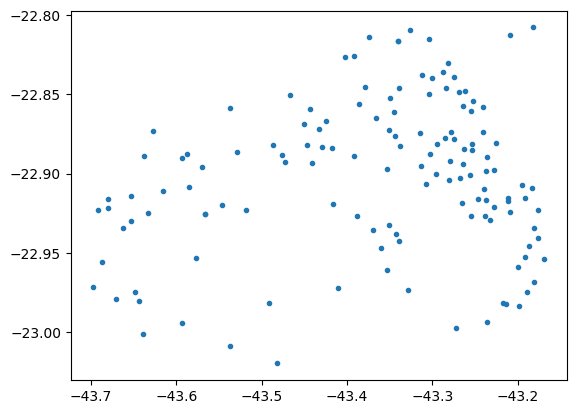

In [66]:
plt.scatter(df_arquivo01['lon'], df_arquivo01['lat'], marker='.')

In [65]:
df_subprefeituras

,bairro,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAUDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO
...,...,...
159,SANTA CRUZ,ZONA OESTE
160,GUARATIBA,ZONA OESTE
161,BARRA DE GUARATIBA,ZONA OESTE
162,PEDRA DE GUARATIBA,ZONA OESTE
